In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv8 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [2]:
designated_ukc_cls = 5
embedding_size = 12
# num_classes= 3
pt_epochs = 2
ukc_label=7
octrain_epochs = 1
lr_rate = 2.5
wait_patience = 8
optimizer = 'adam'

oset = OpenSet()

In [3]:
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, load_from_pkl=True, ablation=1000,
                                                          designated_ukc_cls=designated_ukc_cls)

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, class 5 is added as ukc
ukc_5:, 100
length of train_data - (num_seq_per_cls * num_class)// batch size: 100


vocab_size: 50
all all the dataset
2022-04-25 08:24:54.377366
starting to create ptmodel automatically
staring pre trining
Epoch 1/2
100/100 [==============================] - ETA: 0s - loss: 0.3333 - accuracy: 0.8594 - precision: 0.9223 - recall: 0.7972
Epoch 1: val_accuracy improved from -inf to 0.99740, saving model to data\ptmodel_2022-04-25_08_24_54.377366\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_08_24_54.377366\assets
100/100 [==============================] - 11s 103ms/step - loss: 0.3333 - accuracy: 0.8594 - precision: 0.9223 - recall: 0.7972 - val_loss: 0.0170 - val_accuracy: 0.9974 - val_precision: 0.9974 - val_recall: 0.9974 - lr: 0.0010
Epoch 2/2
100/100 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9806 - precision: 0.9806 - recall: 0.9806
Epoch 2: val_accuracy did not improve from 0.99740
100/100 [==============================] - 9s 93ms/step - loss: 0.0504 - accuracy: 0.9806 - precision: 0.9806 - recall: 0.9806 - val_loss: 0.

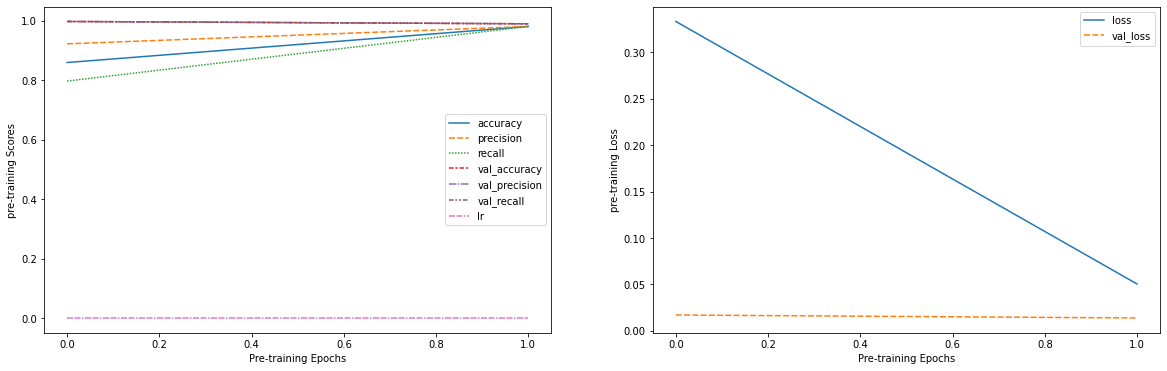

In [4]:
ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
                                             test_data=test_data, pt_epochs=pt_epochs)

In [5]:
### loading the saved model
ptmodel = oset.import_ptmodel()
ptmodel.layers
# ptmodel.summary()
# ptmodel.weights

importing model: data\ptmodel_2022-04-25_08_24_54.377366/


In [6]:
### modify the logs sequences to keep all the meta characters
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           padded_char_len=176, ablation=1000, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',
                                                           designated_ukc_cls=designated_ukc_cls, debug=True)

ablation set to : 1000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, 628 data in class 4 not enough to split into train:800 and validation:100, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 100
75 data in class 6 not enough to split into train:800 and validation:100, adding the entire data as ukc
train: 0    800
1    800
2    800
3    800
Name: label, dtype: int64
val: 0    100
1    100
2    100
3    100
Name: label, dtype: int64
test: 0    100
1    100
2    100
5    100
3      2
Name: label, dtype: int64
test df 0    100
1    100
2    100
4    100
3      2
Name: label, dtype: int64
some example of labels:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 

In [7]:
train_data.element_spec[0].shape[1]

32

vocab_size: 50
all all the dataset
2022-04-25 08:25:24.678744
starting to create ptmodel automatically
staring pre trining
Epoch 1/2
100/100 [==============================] - ETA: 0s - loss: 0.3639 - accuracy: 0.8391 - precision_1: 0.8865 - recall_1: 0.8003
Epoch 1: val_accuracy improved from -inf to 0.99219, saving model to data\ptmodel_2022-04-25_08_25_24.678744\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_08_25_24.678744\assets
100/100 [==============================] - 26s 259ms/step - loss: 0.3639 - accuracy: 0.8391 - precision_1: 0.8865 - recall_1: 0.8003 - val_loss: 0.0210 - val_accuracy: 0.9922 - val_precision_1: 0.9974 - val_recall_1: 0.9922 - lr: 0.0010
Epoch 2/2
100/100 [==============================] - ETA: 0s - loss: 0.0397 - accuracy: 0.9887 - precision_1: 0.9887 - recall_1: 0.9887
Epoch 2: val_accuracy did not improve from 0.99219
100/100 [==============================] - 24s 236ms/step - loss: 0.0397 - accuracy: 0.9887 - precision_1: 0.9887 - recall_1:

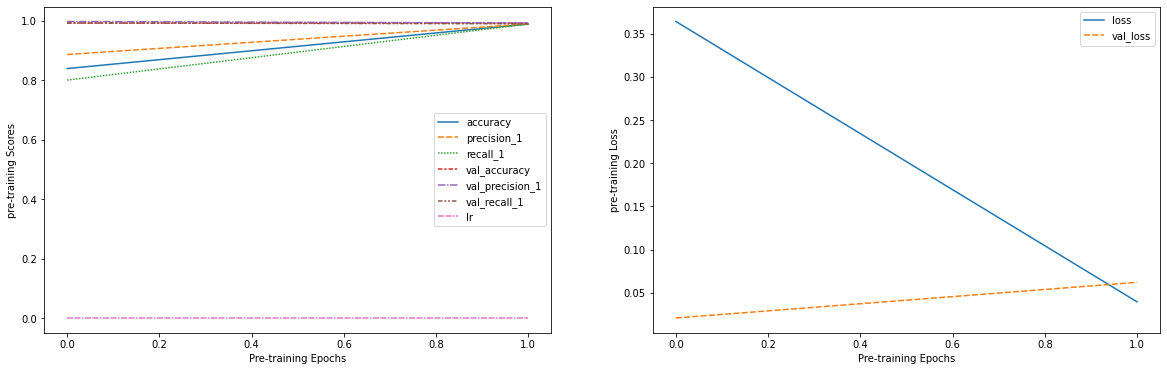

In [8]:
## training the ptmodel with log meta character present achives higher accuracy and precision in same number of epochs
oset = OpenSet()
ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
                                             test_data=test_data, pt_epochs=pt_epochs)

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, class 5 is added as ukc
ukc_5:, 100
length of train_data - (num_seq_per_cls * num_class)// batch size: 100
vocab_size: 50
all all the dataset
2022-04-25 08:26:21.815799
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.3913 - accuracy: 0.8222 - precision_2: 0.8909 - recall_2: 0.7628
Epoch 1: val_accuracy improved from -inf to 0.99219, saving model to data\ptmodel_2022-04-25_08_26_21.815799\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_08_26_21.815799\assets
100/100 [==============================] - 11s 106ms/step - loss: 0.3913 - accuracy: 0.8222 - 

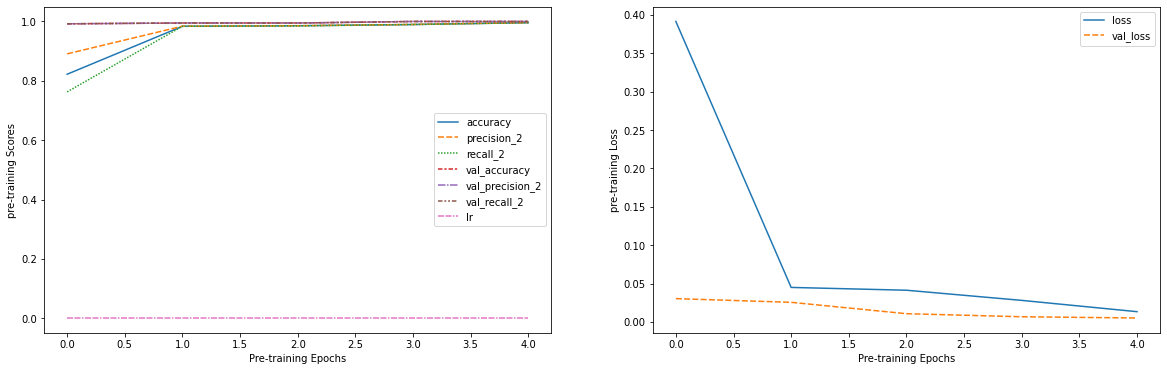

In [9]:
### what happens if the  epoch is increased 
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, load_from_pkl=True, 
                                                           ablation=1000,
                                                          designated_ukc_cls=designated_ukc_cls)
## without meta 5 epochs
oset = OpenSet()
ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
                                             test_data=test_data, pt_epochs=5)

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, class 5 is added as ukc
ukc_5:, 100
length of train_data - (num_seq_per_cls * num_class)// batch size: 100
vocab_size: 50
all all the dataset
2022-04-25 08:27:23.782736
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.4488 - accuracy: 0.7916 - precision_3: 0.8420 - recall_3: 0.7425
Epoch 1: val_accuracy improved from -inf to 0.98438, saving model to data\ptmodel_2022-04-25_08_27_23.782736\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_08_27_23.782736\assets
100/100 [==============================] - 26s 252ms/step - loss: 0.4488 - accuracy: 0

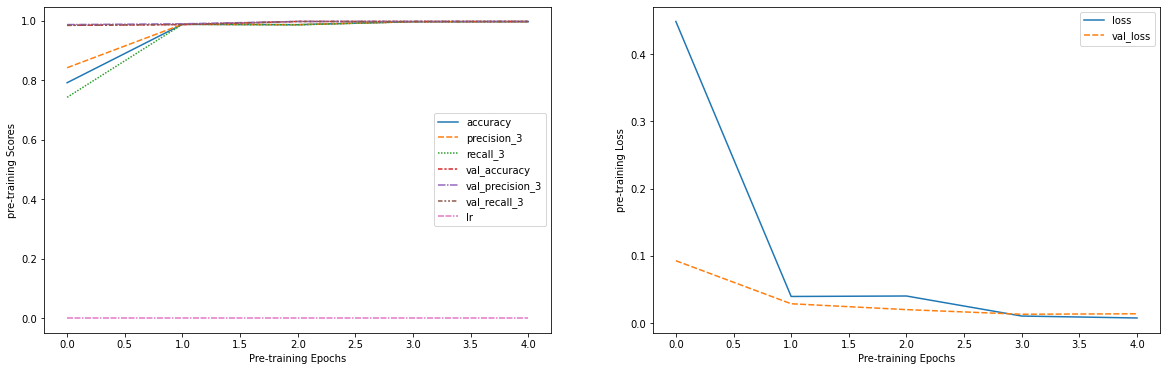

In [10]:
## with meta  176 ukc with 5 epochs
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           padded_char_len=176, ablation=1000, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',
                                                           designated_ukc_cls=designated_ukc_cls, debug=False)
oset = OpenSet()
ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
                                             test_data=test_data, pt_epochs=5)


padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, class 5 is added as ukc
ukc_5:, 100
length of train_data - (num_seq_per_cls * num_class)// batch size: 100
vocab_size: 50
all all the dataset
2022-04-25 08:32:02.926572
starting to create ptmodel automatically
staring pre trining
Epoch 1/8
100/100 [==============================] - ETA: 0s - loss: 0.4488 - accuracy: 0.7916 - precision_4: 0.8420 - recall_4: 0.7425
Epoch 1: val_accuracy improved from -inf to 0.98438, saving model to data\ptmodel_2022-04-25_08_32_02.926572\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_08_32_02.926572\assets
100/100 [==============================] - 26s 253ms/step - loss: 0.4488 - accuracy: 0

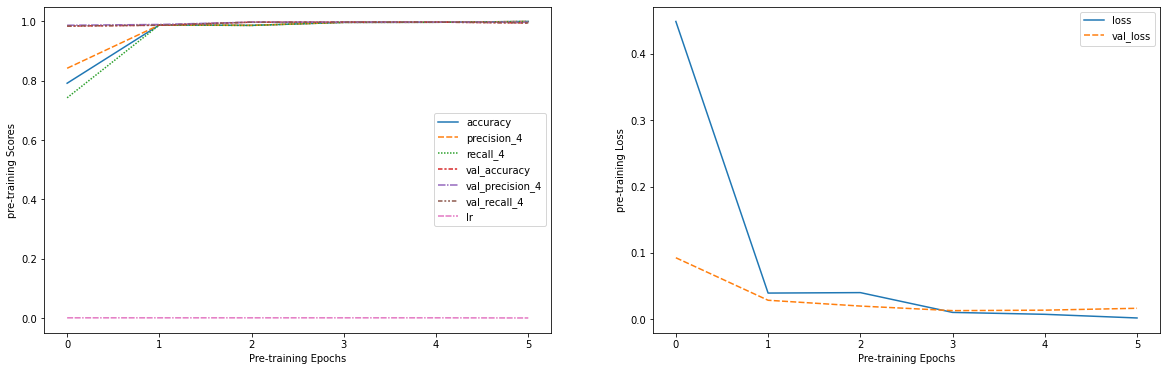

In [11]:
# so increasing chars in line dropped val accuracy from 1 to .9996 for a larger epochs. what happens if epochs are increeased a bit more
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           padded_char_len=176, ablation=1000, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',
                                                           designated_ukc_cls=designated_ukc_cls, debug=False)
oset = OpenSet()
ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
                                             test_data=test_data, pt_epochs=8)

In [ ]:
# higher epoch did not help

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 8000, val_0:, 1000, test_0:, 1000, train_1:, 8000, val_1:, 1000, test_1:, 1000, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 500
vocab_size: 50
all all the dataset
2022-04-25 08:35:11.020219
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
500/500 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9964 - precision_5: 0.9964 - recall_5: 0.9964
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-25_08_35_11.020219\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_08_35_11.020219\assets
500/500 [==============================] - 49s 98ms/step - loss: 0.0108 - accuracy: 0.9964 - precision_5: 0.9964 - recall_5: 0.9964 - val_loss: 1.6928e-05 - val_accuracy:

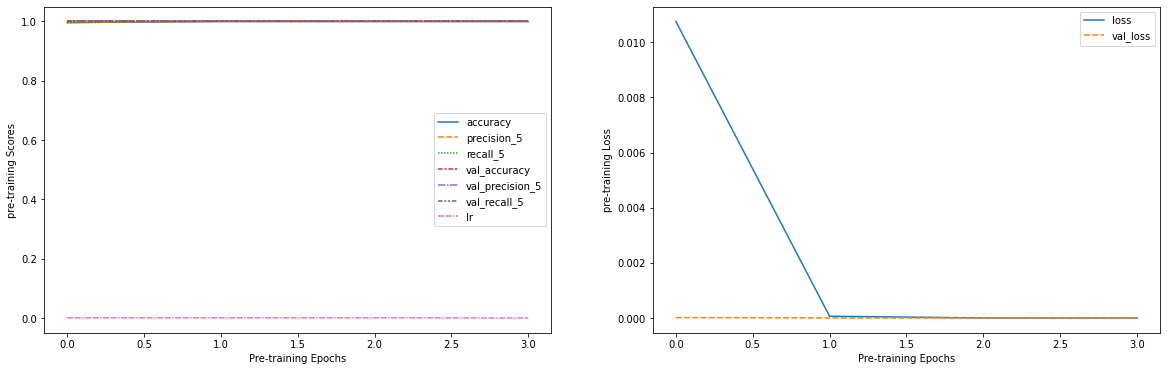

In [12]:
### what happens if the  data  is increased -10K data
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, load_from_pkl=True, 
                                                           ablation=10000,
                                                          designated_ukc_cls=designated_ukc_cls)
## without meta 5 epochs - 10K data
oset = OpenSet()
ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
                                             test_data=test_data, pt_epochs=5)

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000027AF62ADE50>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3312.0_x64__qbz5n2kfra8p0\lib\weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 8000, val_0:, 1000, test_0:, 1000, train_1:, 8000, val_1:, 1000, test_1:, 1000, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 500
vocab_size: 50
all all the dataset
2022-04-25 08:41:24.177844
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
500/500 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9929 - precision_7: 0.9929 - recall_7: 0.9929
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-25_08_41_24.177844\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_08_41_24.177844\assets
500/500 [==============================] - 121s 242ms/step - loss: 0.0156 - accuracy: 0.9929 - precision_7: 0.9929 - recall_7: 0.9929 - val_loss: 6.7804e-06 - val

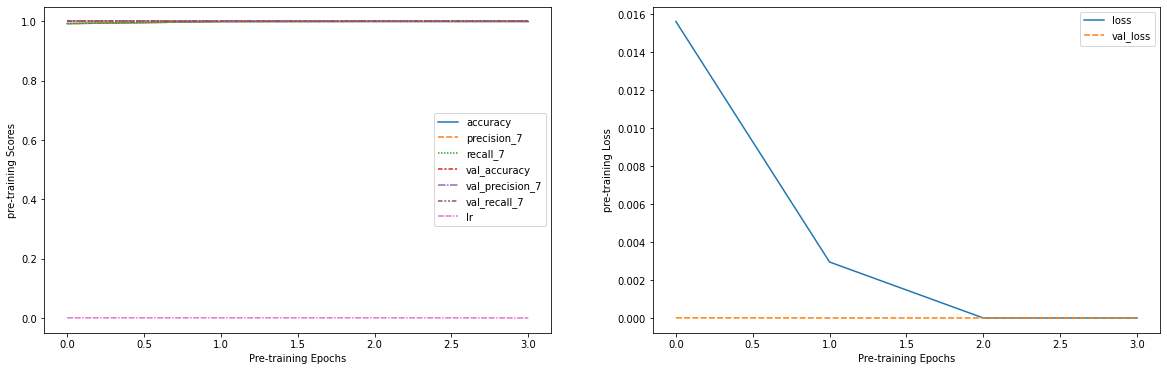

In [14]:
## with meta  176 ukc with 5 epochs - 10K data
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           padded_char_len=176, ablation=10000, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',
                                                           designated_ukc_cls=designated_ukc_cls, debug=False)
oset = OpenSet()
ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
                                             test_data=test_data, pt_epochs=5)

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 22400, val_0:, 2800, test_0:, 2800, train_1:, 22400, val_1:, 2800, test_1:, 2800, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 1400
vocab_size: 50
all all the dataset
2022-04-25 08:50:02.132083
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
1400/1400 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9957 - precision_8: 0.9957 - recall_8: 0.9957
Epoch 1: val_accuracy improved from -inf to 0.99893, saving model to data\ptmodel_2022-04-25_08_50_02.132083\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_08_50_02.132083\assets
1400/1400 [==============================] - 136s 97ms/step - loss: 0.0141 - accuracy: 0.9957 - precision_8: 0.9957 - recall_8: 0.9957 - val_loss: 0.0120 - val_accur

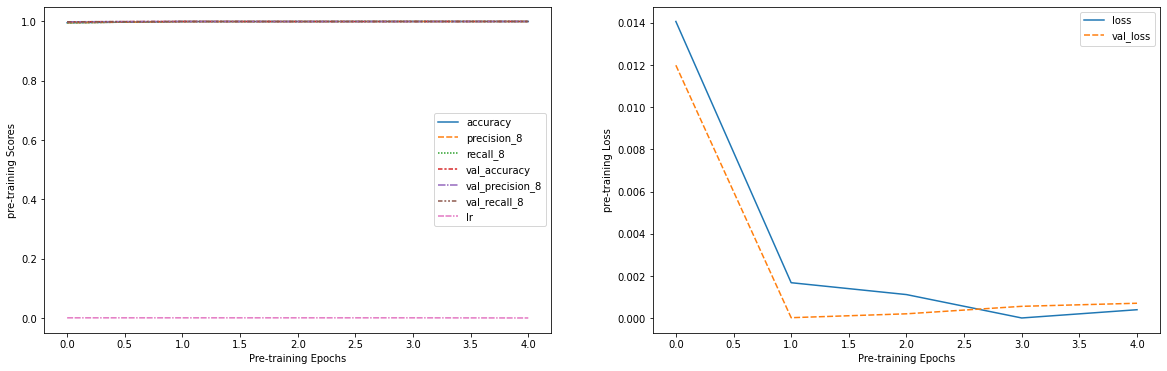

In [15]:
### what happens if the  data  is increased -28K data
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, load_from_pkl=True, 
                                                           ablation=28000,
                                                          designated_ukc_cls=designated_ukc_cls)
## without meta 5 epochs - 10K data
oset = OpenSet()
ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
                                             test_data=test_data, pt_epochs=5)

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 22400, val_0:, 2800, test_0:, 2800, train_1:, 22400, val_1:, 2800, test_1:, 2800, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 1400
vocab_size: 50
all all the dataset
2022-04-25 09:02:02.750823
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
1400/1400 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9950 - precision_9: 0.9950 - recall_9: 0.9950
Epoch 1: val_accuracy improved from -inf to 0.99786, saving model to data\ptmodel_2022-04-25_09_02_02.750823\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_09_02_02.750823\assets
1400/1400 [==============================] - 338s 241ms/step - loss: 0.0332 - accuracy: 0.9950 - precision_9: 0.9950 - recall_9: 0.9950 - val_loss: 0.0131 - 

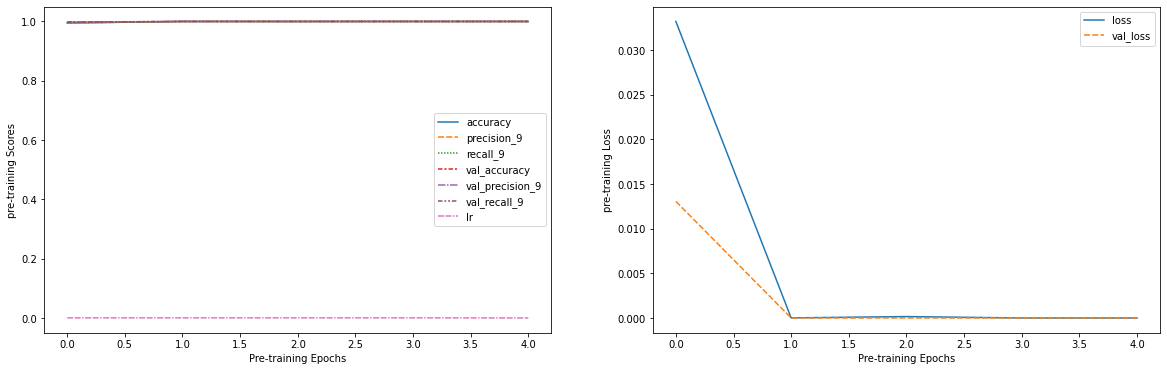

In [16]:
## with meta  176 ukc with 5 epochs - 28k data
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           padded_char_len=176, ablation=28000, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',
                                                           designated_ukc_cls=designated_ukc_cls, debug=False)
oset = OpenSet()
ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
                                             test_data=test_data, pt_epochs=5)